# Analysis Process #

## 1.EDA (Exploratory Data Analysis ) - ##

In [113]:
# Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

# Load the dataset
file_path = 'Energy_Consumption(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop redundant rows (first row with headers again)
data = data[1:].reset_index(drop=True)

# Rename columns for better readability
data.columns = ['Month', 'Fossil_Production', 'Nuclear_Production', 'Renewable_Production', 
                'Primary_Production', 'Energy_Imports', 'Energy_Exports', 
                'Net_Imports', 'Stock_Change', 'Fossil_Consumption', 
                'Nuclear_Consumption', 'Renewable_Consumption', 'Primary_Consumption']

# Convert Month to datetime format
data['Month'] = pd.to_datetime(data['Month'], errors='coerce')

# Convert numerical columns to floats
numeric_cols = data.columns[1:]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing Month or all-numeric NaN rows
data = data.dropna(subset=['Month']).reset_index(drop=True)

# Display cleaned data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Month                  620 non-null    datetime64[ns]
 1   Fossil_Production      620 non-null    float64       
 2   Nuclear_Production     620 non-null    float64       
 3   Renewable_Production   620 non-null    float64       
 4   Primary_Production     620 non-null    float64       
 5   Energy_Imports         620 non-null    float64       
 6   Energy_Exports         620 non-null    float64       
 7   Net_Imports            620 non-null    float64       
 8   Stock_Change           620 non-null    float64       
 9   Fossil_Consumption     620 non-null    float64       
 10  Nuclear_Consumption    620 non-null    float64       
 11  Renewable_Consumption  620 non-null    float64       
 12  Primary_Consumption    620 non-null    float64       
dtypes: da

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_7644\1674540186.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Month'] = pd.to_datetime(data['Month'], errors='coerce')


## 2.Distribution of Energy Production and Consumption Metrics - ##

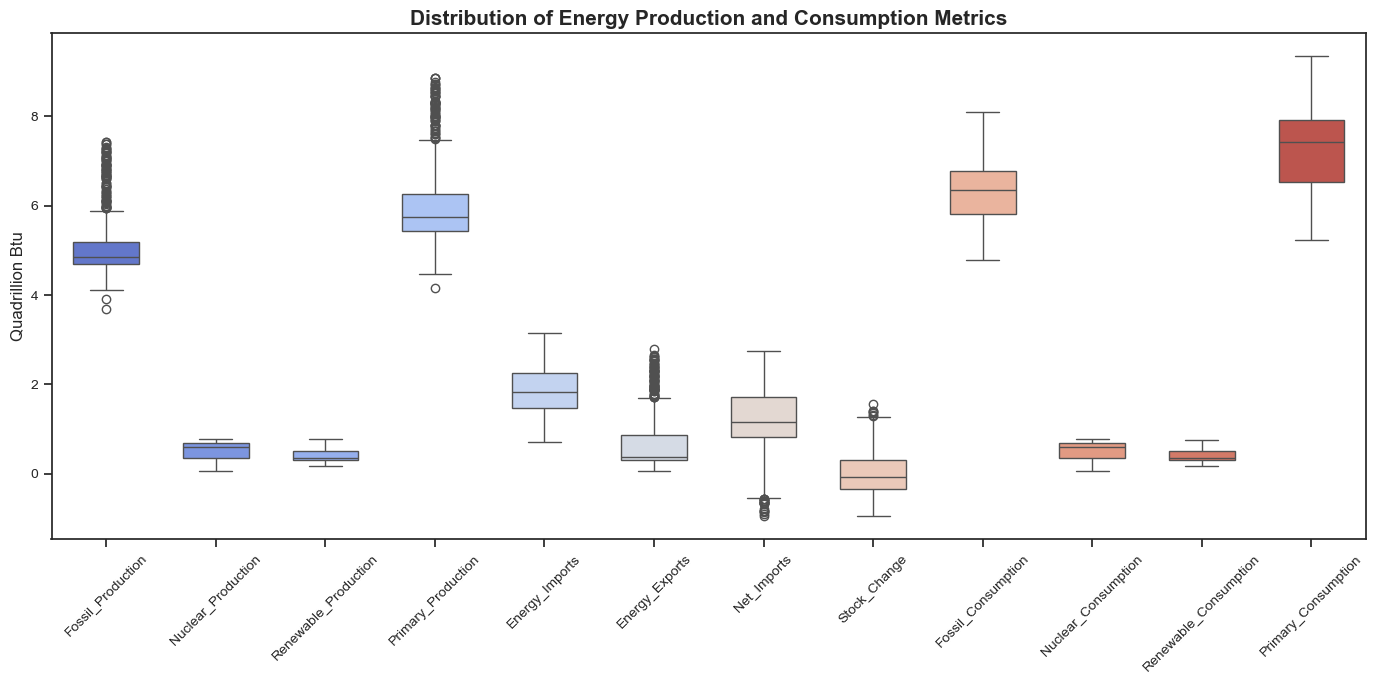

In [114]:
# Boxplot Analysis 
plt.figure(figsize=(14, 7))
sns.boxplot(data=data.iloc[:, 1:], width=0.6, palette='coolwarm')
plt.title("Distribution of Energy Production and Consumption Metrics", fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Quadrillion Btu", fontsize=12)
plt.tight_layout()
plt.show()


## 3.Total Renewable Energy Production Over Time - ##

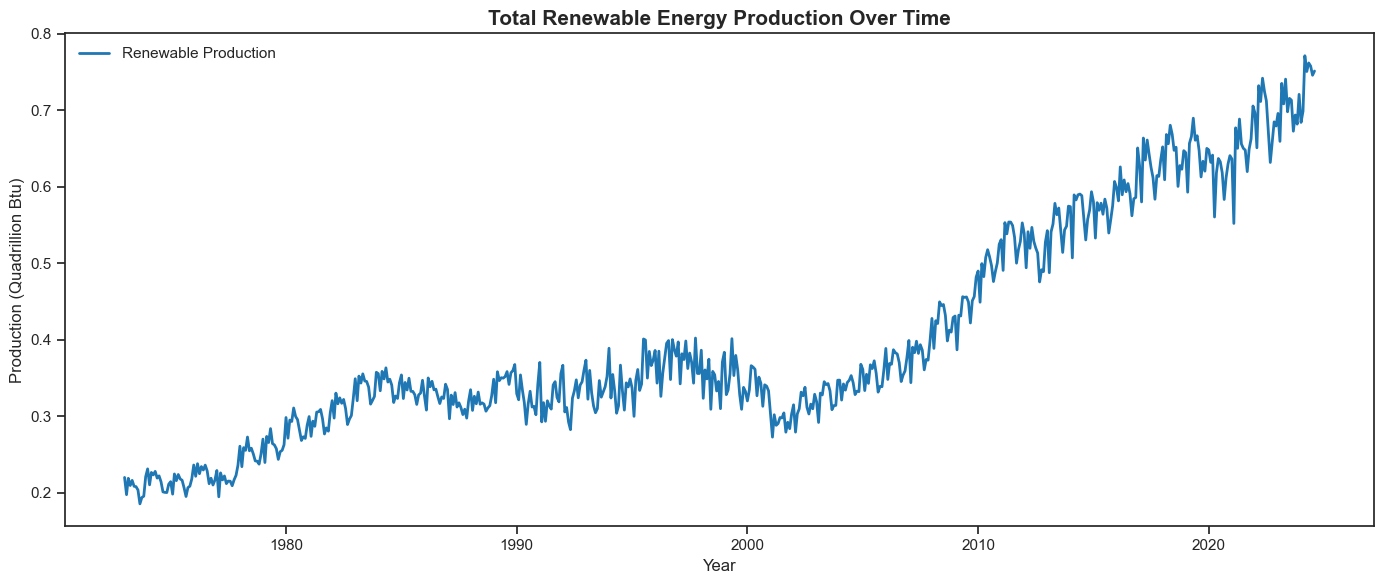

In [115]:
# Renewable Production Over Time 
plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Renewable_Production'], color='#1f77b4', linewidth=2, label='Renewable Production')
plt.title("Total Renewable Energy Production Over Time", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production (Quadrillion Btu)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 4.Renewable Energy Trends with 12-Month Moving Average - ##

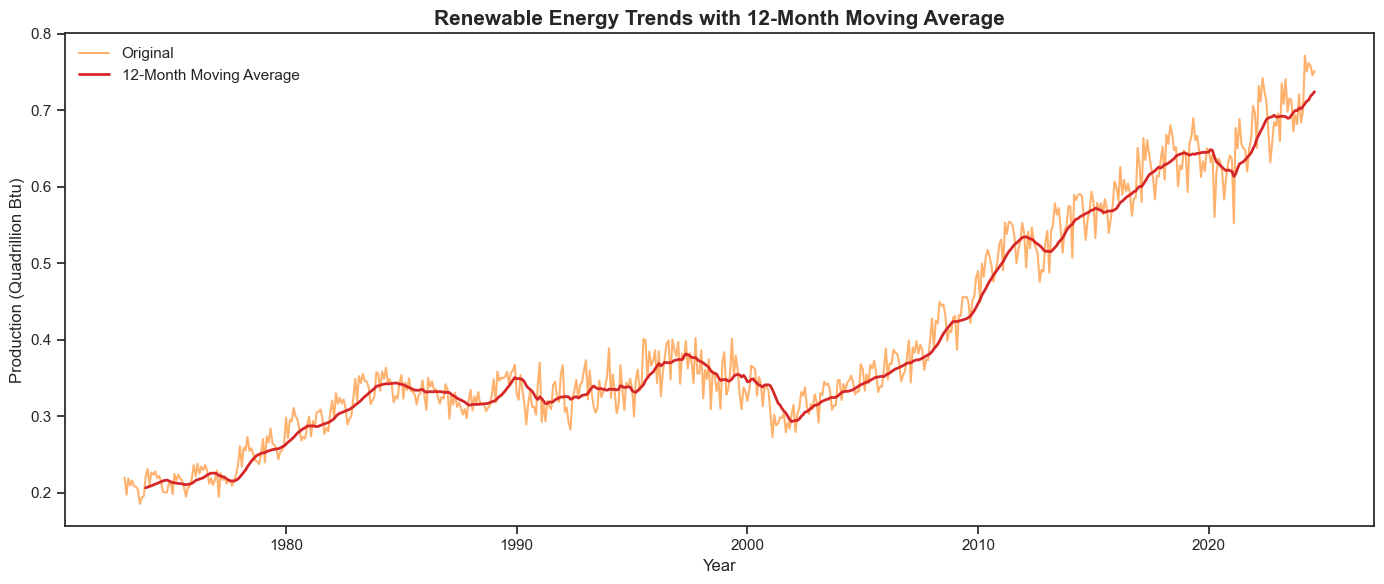

In [116]:
# Moving Average
data['Renewable_MA'] = data['Renewable_Production'].rolling(window=12).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Renewable_Production'], color='#ff7f0e', alpha=0.6, label='Original')
plt.plot(data['Month'], data['Renewable_MA'], color='#d62728', linewidth=2, label='12-Month Moving Average')
plt.title("Renewable Energy Trends with 12-Month Moving Average", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production (Quadrillion Btu)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## 5.Seasonal Decomposition of Renewable Production - ##

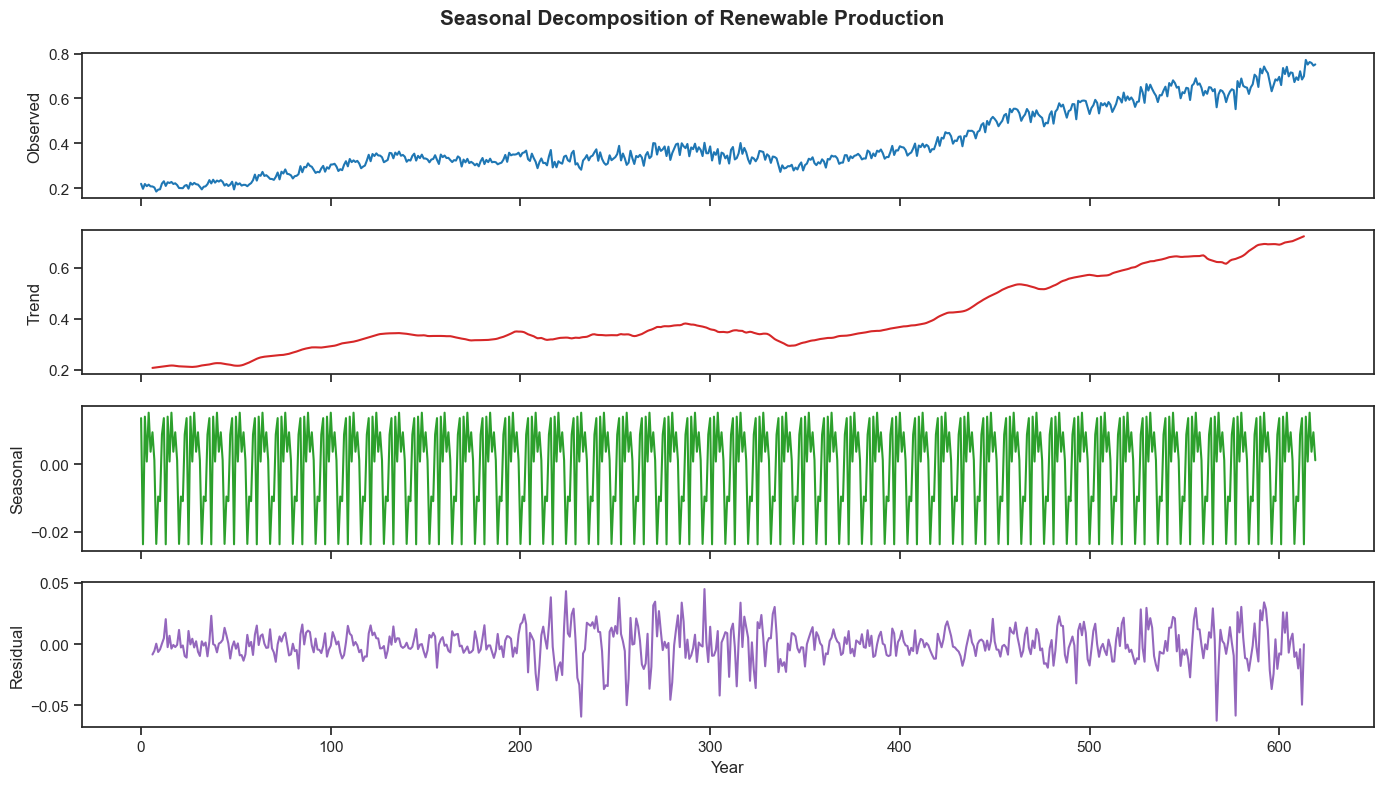

In [117]:
# Seasonal Decomposition 
result = seasonal_decompose(data['Renewable_Production'].dropna(), model='additive', period=12)
fig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
result.observed.plot(ax=axes[0], color='#1f77b4'); axes[0].set_ylabel("Observed")
result.trend.plot(ax=axes[1], color='#d62728'); axes[1].set_ylabel("Trend")
result.seasonal.plot(ax=axes[2], color='#2ca02c'); axes[2].set_ylabel("Seasonal")
result.resid.plot(ax=axes[3], color='#9467bd'); axes[3].set_ylabel("Residual")
axes[3].set_xlabel("Year")
plt.suptitle("Seasonal Decomposition of Renewable Production", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## 6.Correlation Heatmap - ##

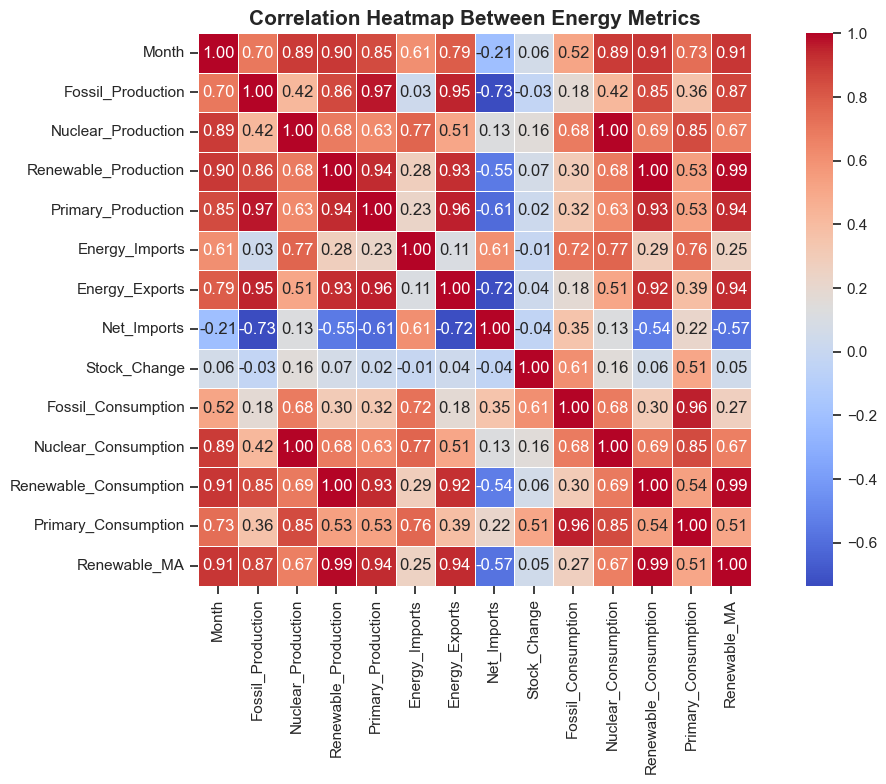

In [118]:
# Correlation Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap Between Energy Metrics", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## 7.Net Energy Balance Over Time - ##

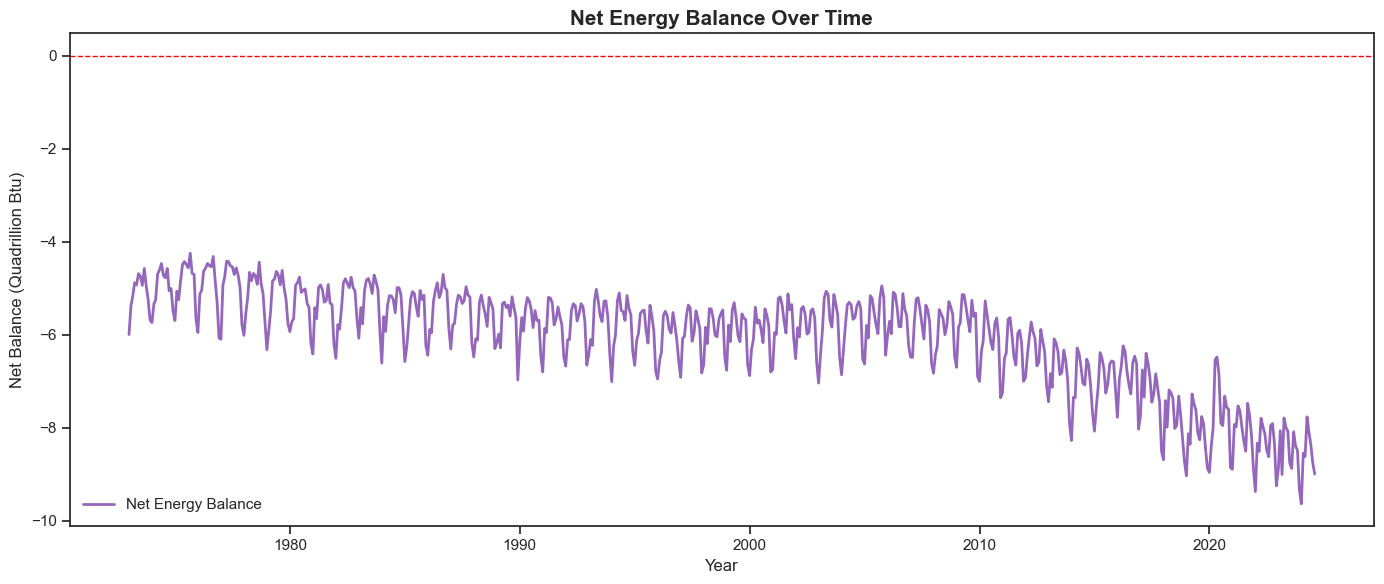

In [119]:
# Net Energy Balance 
data['Net_Energy_Balance'] = data['Energy_Imports'] - data['Energy_Exports'] - data['Primary_Consumption']

plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Net_Energy_Balance'], color='#9467bd', linewidth=2, label='Net Energy Balance')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Net Energy Balance Over Time", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Balance (Quadrillion Btu)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 8.Energy Efficiency Over Time - ##

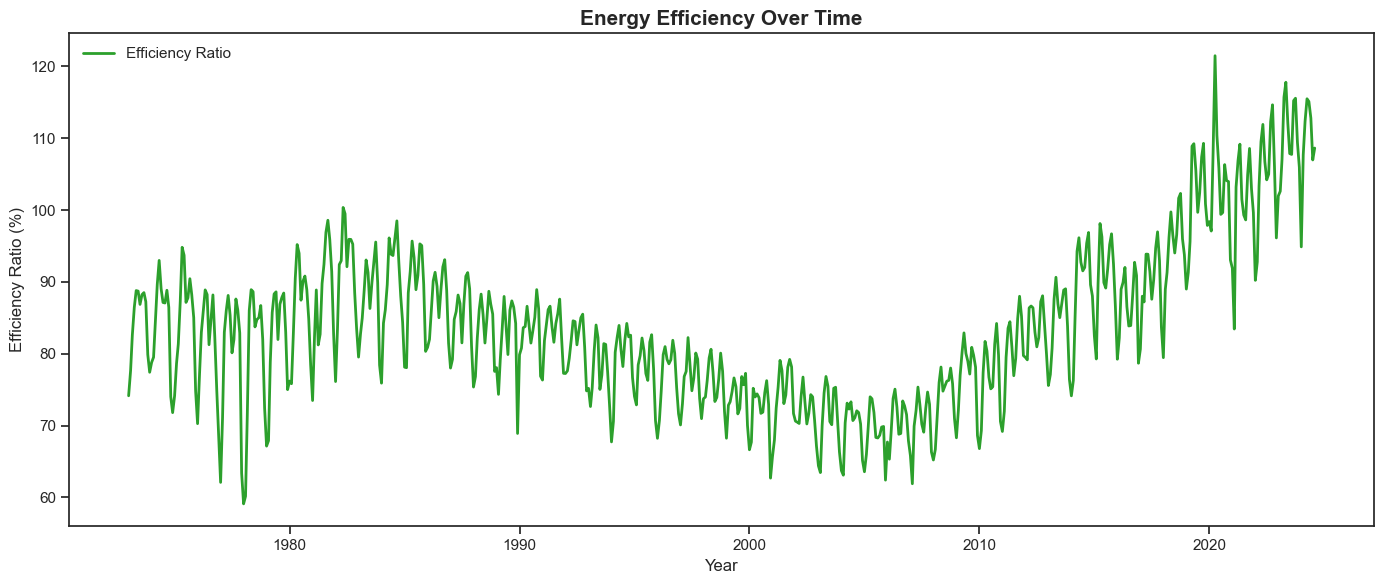

In [120]:
# Energy Efficiency 
data['Efficiency_Ratio'] = (data['Primary_Production'] / data['Primary_Consumption']) * 100

plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Efficiency_Ratio'], color='#2ca02c', linewidth=2, label="Efficiency Ratio")
plt.title("Energy Efficiency Over Time", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Efficiency Ratio (%)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 9. Energy Imports, Exports, and Consumption Over Time - ##

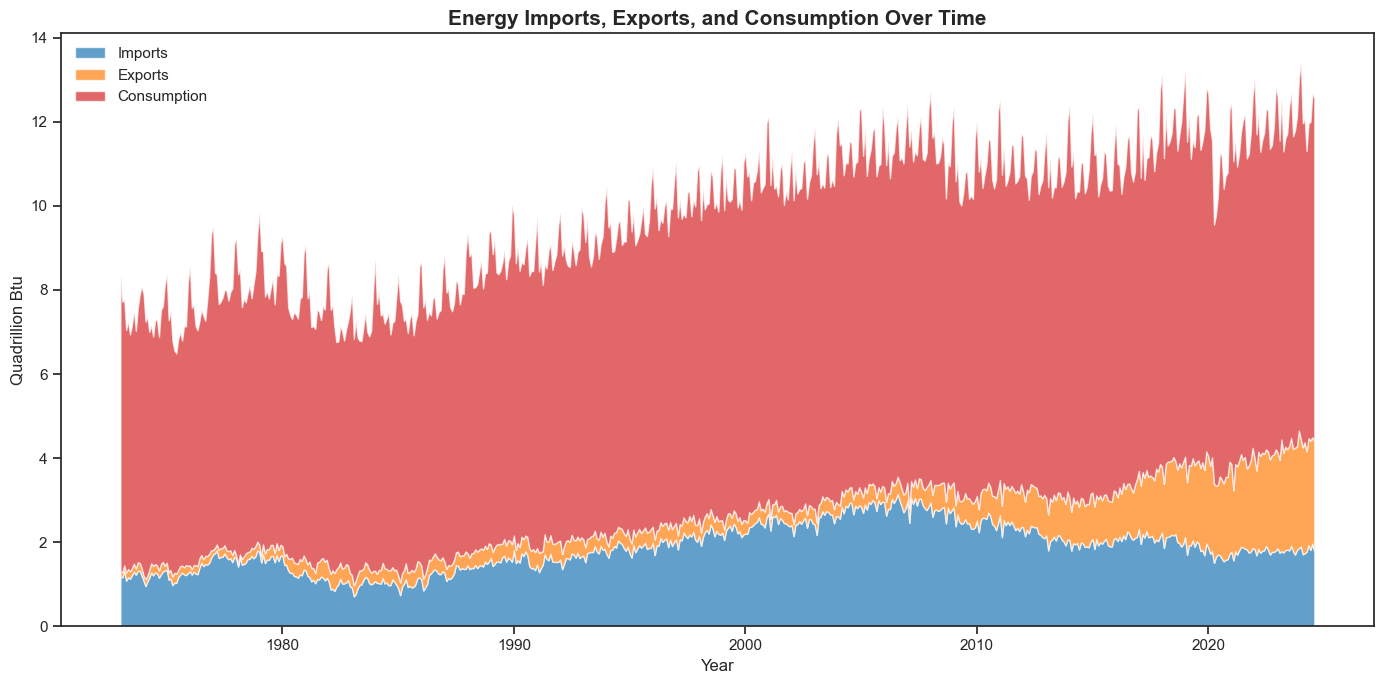

In [121]:
# Stacked Area Chart 
plt.figure(figsize=(14, 7))
plt.stackplot(data['Month'], 
              data['Energy_Imports'], 
              data['Energy_Exports'], 
              data['Primary_Consumption'], 
              labels=['Imports', 'Exports', 'Consumption'], 
              alpha=0.7, colors=['#1f77b4', '#ff7f0e', '#d62728'])
plt.title("Energy Imports, Exports, and Consumption Over Time", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Quadrillion Btu", fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 10.Energy Variables Pair Plot - ##

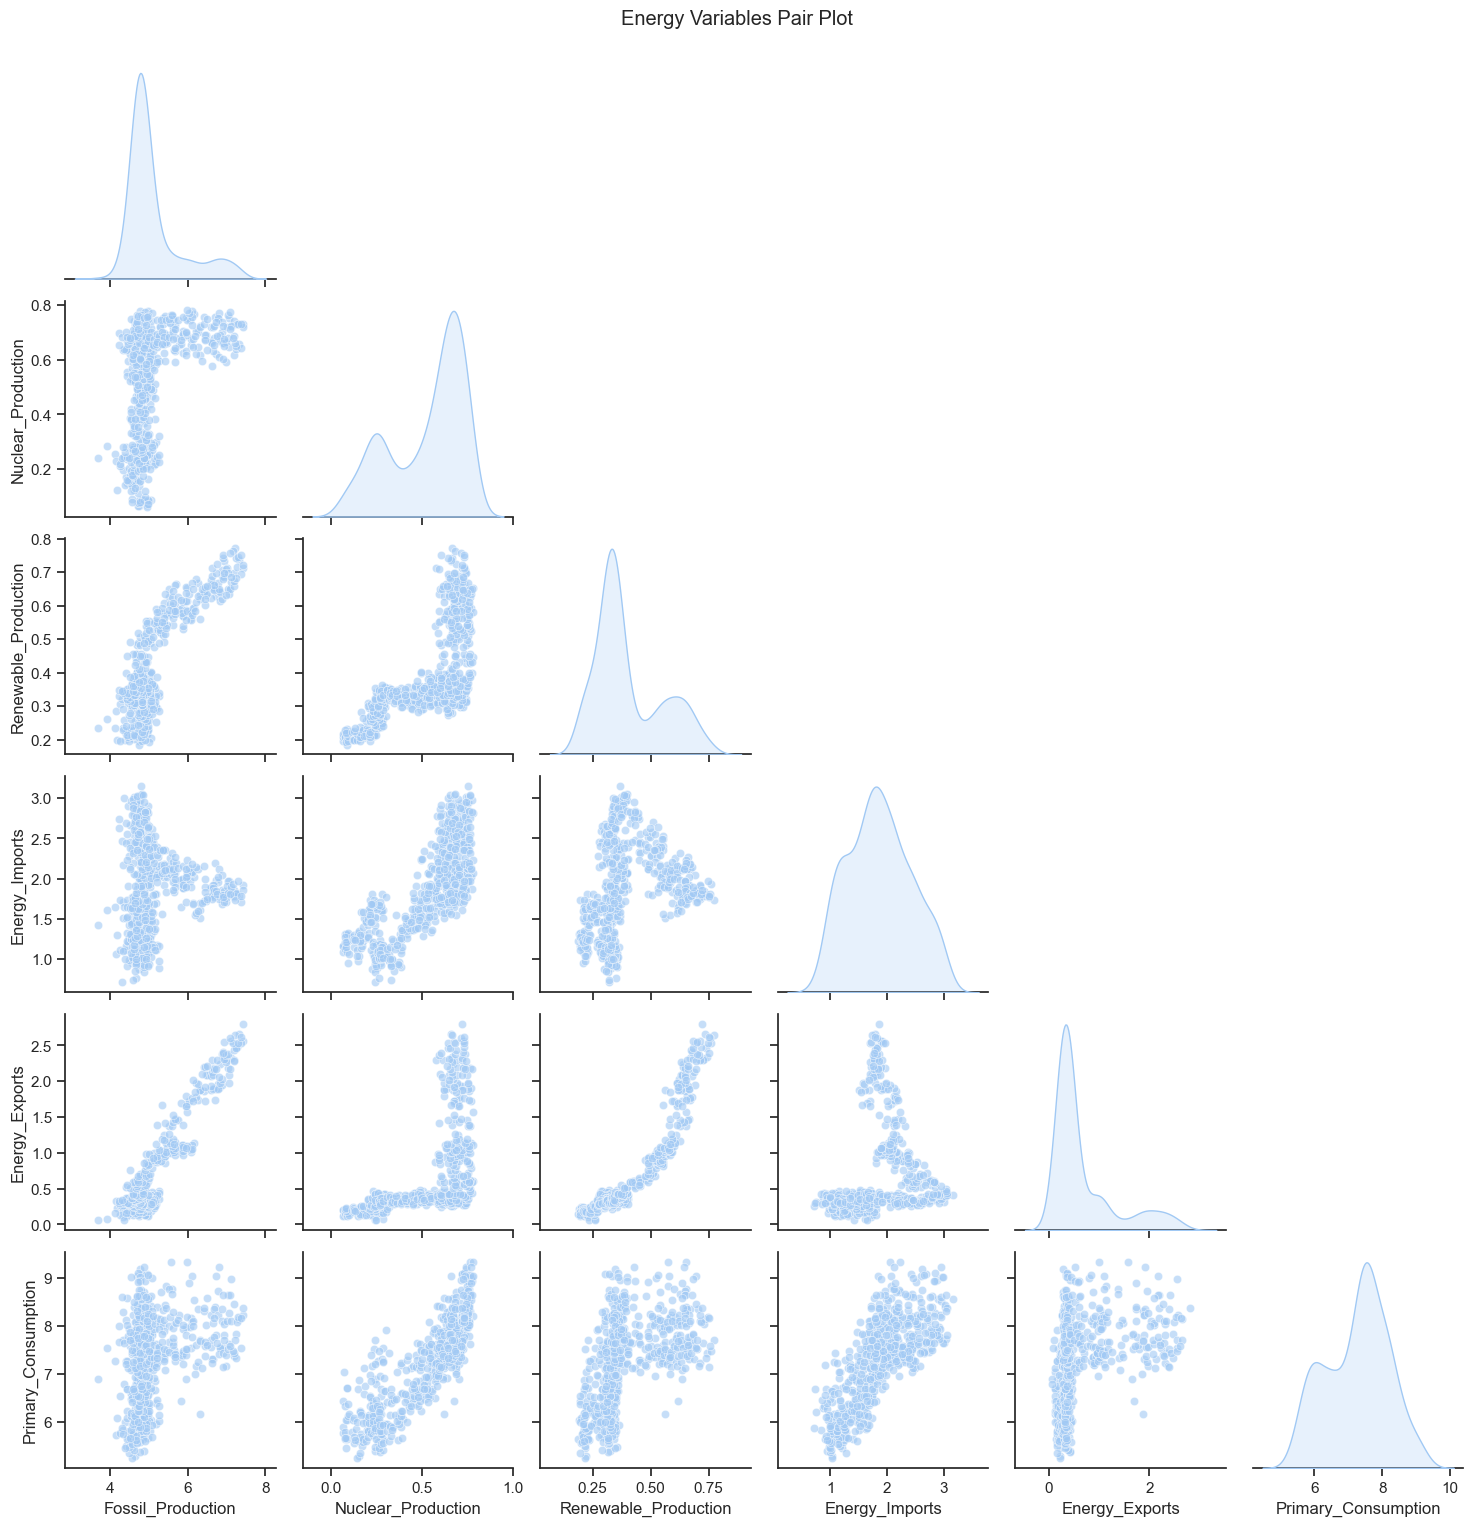

In [122]:
# Pair Plot 
selected_columns = ['Fossil_Production', 'Nuclear_Production', 'Renewable_Production', 
                    'Energy_Imports', 'Energy_Exports', 'Primary_Consumption']
data_cleaned = data[selected_columns].apply(pd.to_numeric, errors='coerce').dropna()

sns.set(style="ticks", palette="pastel")
pair_plot = sns.pairplot(data_cleaned, diag_kind="kde", corner=True, plot_kws={'alpha': 0.6})
pair_plot.fig.suptitle("Energy Variables Pair Plot", y=1.02)  # Add a title
plt.show()

## 11.Fossil Production vs Primary Consumption - ##

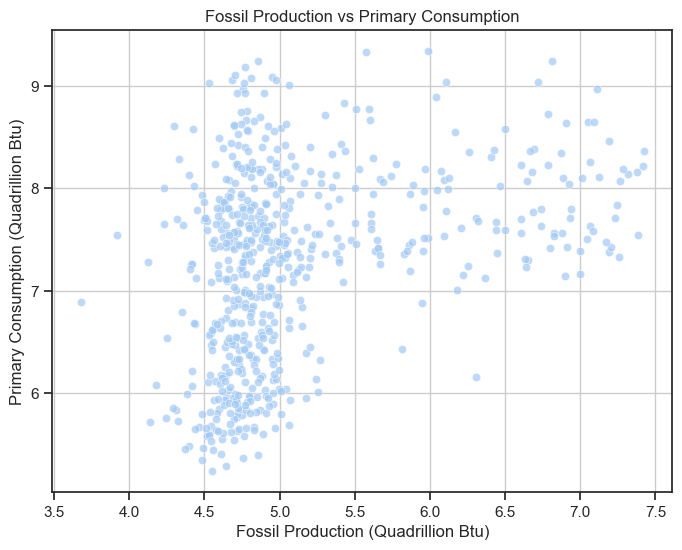

In [123]:
# Scatter Plot Example
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='Fossil_Production', y='Primary_Consumption', alpha=0.7)
plt.title("Fossil Production vs Primary Consumption")
plt.xlabel("Fossil Production (Quadrillion Btu)")
plt.ylabel("Primary Consumption (Quadrillion Btu)")
plt.grid(True)
plt.show()


## 12.Distribution of Renewable Energy Production - ##

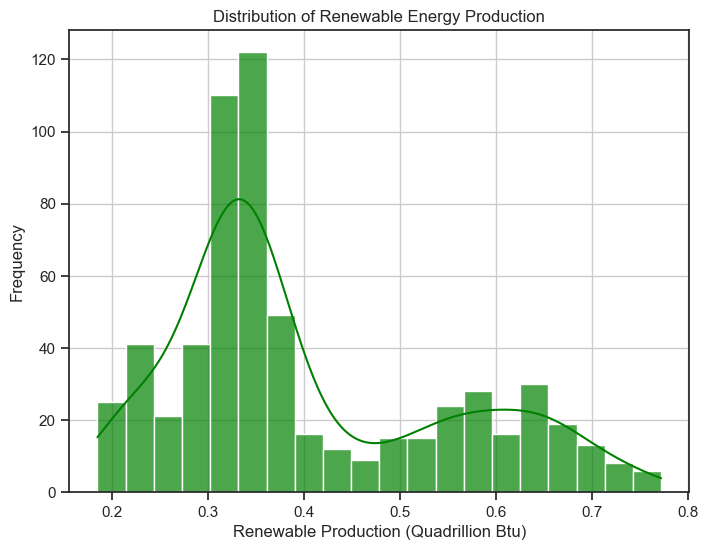

In [124]:
# Distribution Plot Example 
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Renewable_Production'], kde=True, color='green', bins=20, alpha=0.7)
plt.title("Distribution of Renewable Energy Production")
plt.xlabel("Renewable Production (Quadrillion Btu)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### THANK YOU ###